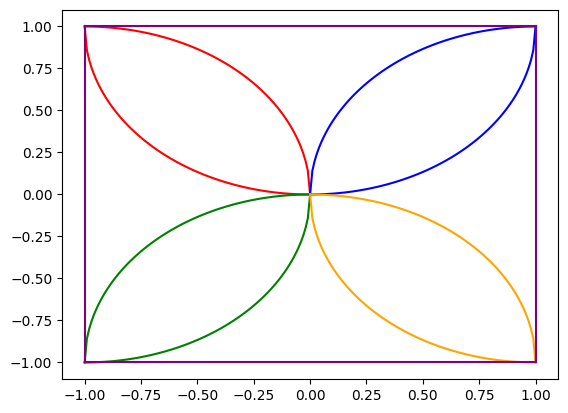

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_problem():
    xp = np.linspace(0,1,100) #Espaço de pontos x>0
    xm = np.linspace(-1,0,100) #Espaço de pontos x<0

    ycm = -np.sqrt(1-xm**2)+1 # Curva superior direta
    ycp = -np.sqrt(1-xp**2)+1 # Curva superior esquerda
    ybm = np.sqrt(1-xm**2)-1 # Curva inferior esquerda
    ybp = np.sqrt(1-xp**2)-1 # Curva superior direita
    ydc = np.sqrt(1-(xp-1)**2) # Curva direita superior
    ydb = -np.sqrt(1-(xp-1)**2) # Curva direita inferior
    yeb = -np.sqrt(1-(xm+1)**2) # Curva esquerda inferior
    yec = np.sqrt(1-(xm+1)**2) # Curva esquerda superior

    plt.plot(xm,ycm, 'r') # Curva superior direta
    plt.plot(xm,yec, 'r') # Curva esquerda superior
    plt.plot(xp,ycp, 'b') # Curva superior esquerda
    plt.plot(xp,ydc, 'b') # Curva direita superior
    plt.plot(xm,ybm, 'g') # Curva inferior esquerda
    plt.plot(xm,yeb, 'g') # Curva esquerda inferior
    plt.plot(xp,ybp, 'orange') # Curva superior direita
    plt.plot(xp,ydb, 'orange') # Curva direita inferior

    #plot do quadrado
    plt.plot([-1, -1], [-1, 1], 'purple')
    plt.plot([1, 1], [-1, 1], 'purple')
    plt.plot([-1, 1], [-1, -1], 'purple')
    plt.plot([-1, 1], [1, 1], 'purple')

    plt.show()

plot_problem()


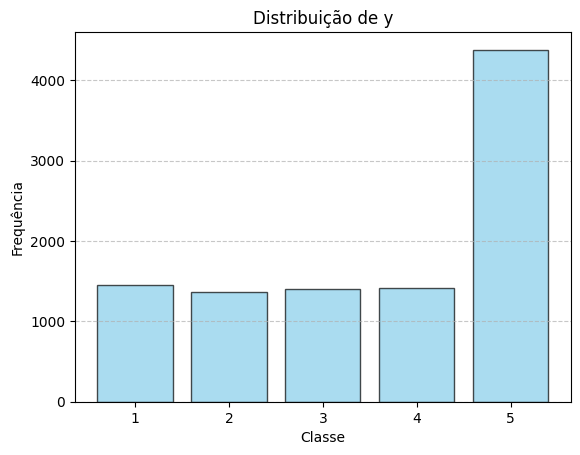

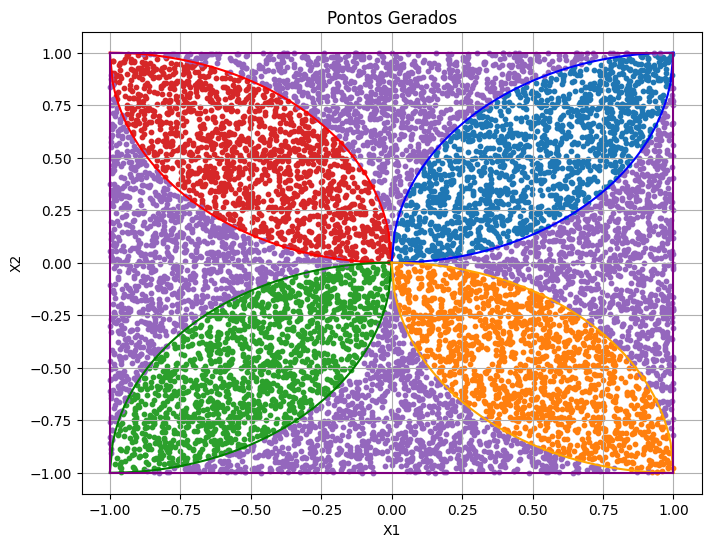

In [2]:
# Função para gerar os dados
def generate_data(num_samples):
    X = np.zeros((num_samples, 2))
    y = np.zeros(num_samples, dtype=int)

    for i in range(num_samples):
        x1 = np.random.uniform(-1, 1)
        x2 = np.random.uniform(-1, 1)

        if x1 >= 0 and x1 <=1:
            if x2 >= -np.sqrt(1-x1**2)+1 and x2 <= np.sqrt(1-(x1-1)**2):
                y[i] = 1
            elif x2 >= -np.sqrt(1-(x1-1)**2) and x2 <= np.sqrt(1-x1**2)-1:
                y[i] = 2
            else:
                y[i] = 5
        elif x1 >=-1 and x1 <0:
            if x2 >= -np.sqrt(1-(x1+1)**2) and x2 <= np.sqrt(1-x1**2)-1:
                y[i] = 3
            elif x2 >= -np.sqrt(1-x1**2)+1 and x2 <= np.sqrt(1-(x1+1)**2):
                y[i] = 4
            else:
                y[i] = 5
        else:
            y[i] = 5


        X[i] = [x1, x2]

    return X, y

# Gerar dados
num_samples = 10000
X, y = generate_data(num_samples)


# Plotar histograma de y
plt.hist(y, bins=np.arange(1, 7) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks(range(1, 6))
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.title('Distribuição de y')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotar os pontos gerados
plt.figure(figsize=(8, 6))
for label in range(1, 6):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Classe {label}', s=10)


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Pontos Gerados')
plt.grid(True)
plot_problem()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Construir o modelo da rede neural
model = Sequential([
    Dense(50, activation='relu', input_shape=(2,)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(6, activation='softmax')  # Camada de saída
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=500, validation_data=(X_test, y_test), verbose=0)


Test Loss: 0.04959435388445854
Test Accuracy: 0.9788749814033508
250/250 [==============================] - 0s 1ms/step
Confusion Matrix:
[[1136    0    0    0   36]
 [   1 1072    0    0   15]
 [   0    0 1083    0   46]
 [   1    0    0 1095   24]
 [   8   20    7   11 3445]]


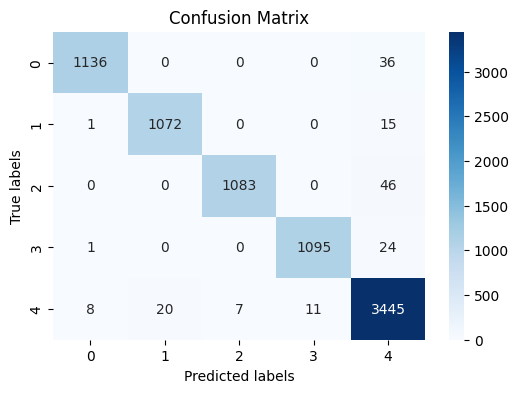

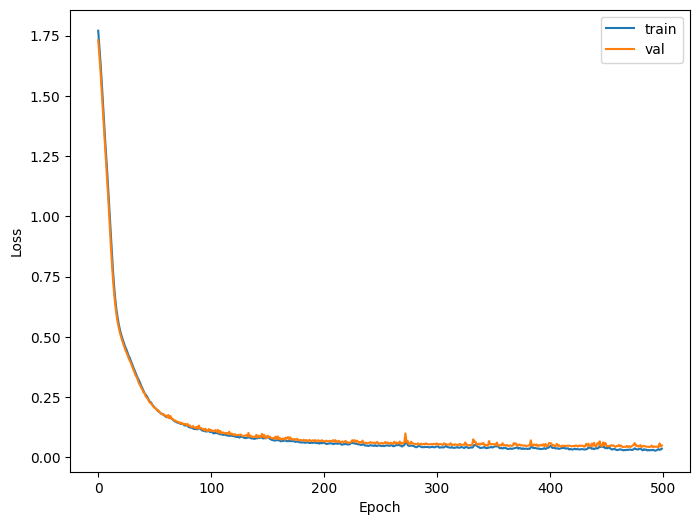

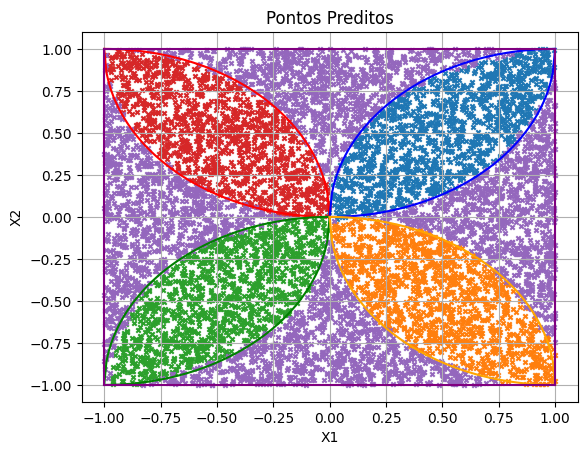

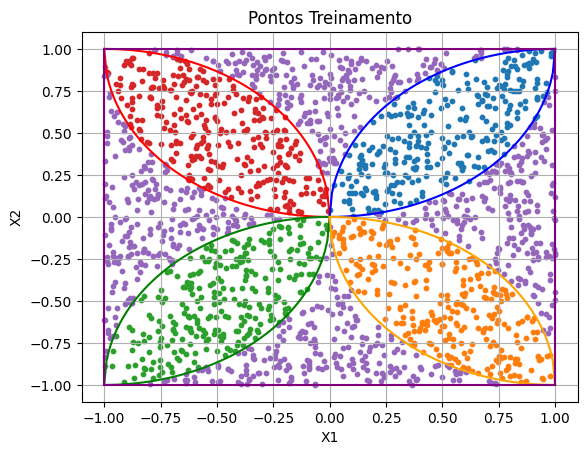

In [4]:
# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Gerar previsões
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calcular matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Plotar matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Visualizar a curva do erro de treinamento e validação
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plotar os pontos previstos
for label in range(1, 6):
    plt.scatter(X_test[y_pred_labels == label][:, 0], X_test[y_pred_labels == label][:, 1], label=f'Predito {label}', marker='x', s=10)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Pontos Preditos')
#plt.legend()
plt.grid(True)
plot_problem()
plt.show()

# Plotar os pontos de cada classe no conjunto de teste
for label in range(1, 6):
    plt.scatter(X_train[y_train == label][:, 0], X_train[y_train == label][:, 1], label=f'Classe {label}', s=10)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Pontos Treinamento')
#plt.legend()
plt.grid(True)
plot_problem()
plt.show()